# Проект: Статистический анализ данных

# Описание проекта:
**У нас есть данные о пользователях из разных городов, которые пользуются мобильным приложением GoFast для совершения поездок по городу. Пользователи могут пользоваться сервисом двумя способами:**

**Без подписки: Они не платят за подписку, стоимость одной минуты поездки составляет 8 рублей, а стартовая стоимость (начало поездки) - 50 рублей.
С подпиской Ultra: Пользователи платят за подписку в размере 199 рублей в месяц. Однако у них нет стартовой платы, и стоимость одной минуты поездки составляет 6 рублей.**

# Цель проекта:
**Мы проведем анализ этих данных и проверим несколько гипотез, которые помогут определить, какие меры можно принять, чтобы развить бизнес.**

# План работы



**1.1 Считать CSV-файлы с данными с помощью библиотеки pandas и сохранить их в датафреймы.
  ** - Пути к файлам:
     - /datasets/users_go.csv
     - /datasets/rides_go.csv
     - /datasets/subscriptions_go.csv**
     
**1.2 Вывести первые строки каждого набора данных и изучить общую информацию о каждом датафрейме.**

# Шаг 2. Предобработка данных

**2.1 Привести столбец date к типу даты pandas.
  2.2 Создать новый столбец с номером месяца на основе столбца date.
  2.3 Проверить наличие пропущенных значений и дубликатов в датафреймах и обработать их, если такие значения присутствуют.**

# Шаг 3. Исследовательский анализ данных

**3.1 Описать и визуализировать общую информацию о пользователях и поездках:**

**- Частота встречаемости городов.**

**- Соотношение пользователей с подпиской и без подписки**

**- Возраст пользователей**

**- Расстояние, которое пользователь преодолел за одну поездку**

**- Продолжительность поездок.**

# Шаг 4. Объединение данных

**4.1 Объединить данные о пользователях, поездках и подписках в один датафрейм с помощью метода merge().**
**4.2 Создать два датафрейма:**

**- С данными о пользователях без подписки.**

**- С данными о пользователях с подпиской.**

**4.3 Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.**

# Шаг 5. Подсчет выручки

**5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

**5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 должны быть преобразованы к 
26
26.**

# Шаг 6. Проверка гипотез

**6.1 Проверить гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки.**
**6.2 Проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.**
**6.3 Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.**
**6.4 Для проверки гипотезы о том, снизилось ли количество обращений в техподдержку после обновления серверов, использовать соответствующий статистический тест.**

In [1]:
# Импортируем библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

#### Шаг 1. Загрузка данных

# 1.1  Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.

In [2]:
# Считаем данные и зададим переменные
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

# 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
# Изучим общую информацию датафрейма 'users_go'
display(users_go.head())
print()
print(users_go.info())
display(users_go.describe())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


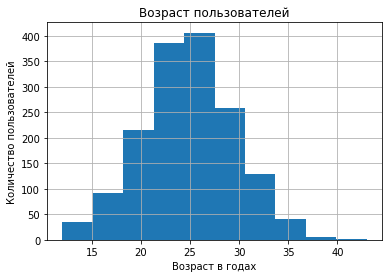

In [4]:
# Построим гистограмму столбца 'age'
plt.hist(users_go['age'], bins=10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст в годах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [5]:
# Подсчитаем кол-во явных дубликатов в датафрейме 'users_go'
users_go.duplicated().sum()


31

In [6]:
# Изучим общую информацию датафрейма 'rides_go'
print(rides_go.head())
print()
print(rides_go.info())
print(rides_go.describe())

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.00000

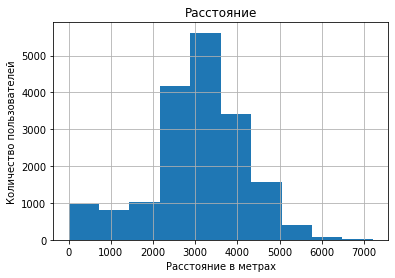

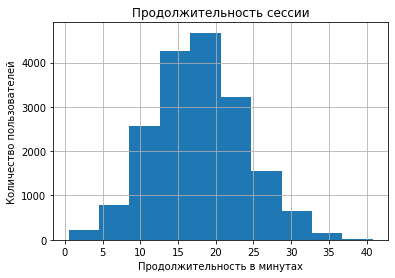

In [7]:
# Построим гистограммы по столбцам 'distance' и 'duration'
plt.hist(rides_go['distance'], bins=10)
plt.title('Расстояние')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

plt.hist(rides_go['duration'], bins=10)
plt.title('Продолжительность сессии')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [8]:
# Подсчитаем кол-во явных дубликатов в датафрейме 'rides_go'
rides_go.duplicated().sum()


0

In [9]:
# Изучим общую информацию датафрейма 'subscriptions_go'
print(subscriptions_go.head())
print()
print(subscriptions_go.info())
print(subscriptions_go.describe())

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None
       minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0.000000
25%        6.500000         12.500000         49.750000
50%        

В датафрейме 'users_go' 5 столбцов и 1565 записи, пропуски отсутствуют, названия столбцов соответсвтуют "змеиному регистру". Также мы нашли явные дубликаты: их 31.

В датафрейме 'rides_go' 4 столбца и 18068 записи, пропуски отсутствуют, названия столбцов соответсвтуют "змеиному регистру". Явные дубликаты отсутствуют.

В датафрейме 'subscriptions_go' 4 столбца и 2 записи, пропуски отсутствуют, названия столбцов соответсвтуют "змеиному регистру". Явные дубликаты отсутствуют, некорректный тип данных для всех столбцов.


Данные в порядке и готовы для исследования.

#### Шаг 2. Предобработка данных

# 2.1 Приведите столбец 'date' к типу даты pandas.

In [10]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

# 2.2 Создайте новый столбец с номером месяца на основе столбца 'date'.

In [11]:
rides_go['month'] = rides_go['date'].dt.month
rides_go['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

In [12]:
# Округлилим distance до 2 знаков после запятой.
rides_go['distance'] = rides_go['distance'].round(2)

# 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [13]:
# Подсчитаем кол-во явных дубликатов в столбце 'user_id'
users_go['user_id'].duplicated().sum()

31

In [14]:
# Удалим дубликаты
users_go.drop_duplicates(subset='user_id', inplace=True)
# Проверка наличия дубликатов
users_go['user_id'].duplicated().sum()

0

In [15]:
# Датафейм 'users_go'
users_go.info()
users_go.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Предобработка данных в датафрейме 'users_go' сократило количество строк до 1534.

In [16]:
# Датафейм 'rides_go'
rides_go.info()
rides_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


Во время предобработки данных в датафрейме 'rides_go':
- Был добавлен стобец 'month' 
- Округлили 'distance' до 2 знаков после запятой
- Привели столбец 'date' к типу datetime64

Датафрейм 'subscriptions_go' не изменяли 

#### Шаг 3. Исследовательский анализ данных

# Опишите и визуализируйте общую информацию о пользователях и поездках:

# 3.1 частота встречаемости городов

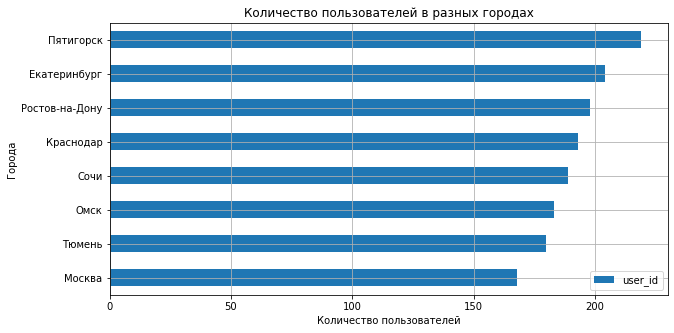

Количество пользователей в разных городах
                user_id
city                   
Пятигорск           219
Екатеринбург        204
Ростов-на-Дону      198
Краснодар           193
Сочи                189
Омск                183
Тюмень              180
Москва              168


In [17]:
# Создаем сводную таблицу, сгруппированную по городам, и подсчитаем количества пользователей для каждого города
pivot_table_city = users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)

# Строим горизонтальную столбчатую диаграмму
pivot_table_city.plot(kind='barh', grid=True, figsize=(10, 5))
plt.title('Количество пользователей в разных городах')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

# Вывод количества пользователей в разных городах
print('Количество пользователей в разных городах')
users_count_by_city = users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
print(users_count_by_city)


ВЫВОД:

Визуализация и сортировка пользователей указывает что лидер по количевству пользователей является Пятигорск за ним Екатеринбург, Ростов-на-Дону, Краснодар, Сочи. Примечательно что в ТОП-5 входят города, находящиеся на юге, где сезон проката более длителен. Исключением является город Екатеринбург, который находится на втором месте.


# 3.2 соотношение пользователей с подпиской и без подписки

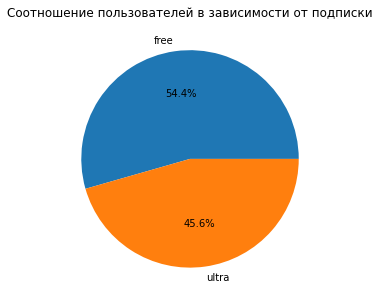

In [18]:
# Создаем сводную таблицу, сгруппированную по типу подписки, и подсчитаем количества пользователей для каждого типа
pivot_table_subscriptions = users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

# Строим круговую диаграмму
plt.figure(figsize=(10, 5))
plt.pie(pivot_table_subscriptions['user_id'], labels=pivot_table_subscriptions.index, autopct='%1.1f%%')
plt.title('Соотношение пользователей в зависимости от подписки')
plt.show()

In [19]:
subscription_ratio = users_go.groupby('subscription_type').agg(
    Количество=('user_id', 'size')
)  # Подсчитываем количество пользователей в каждой группе

# Соотношение пользователей в зависимости от подписки
subscription_ratio['Доля'] = subscription_ratio['Количество'] / users_go['user_id'].count()
print(subscription_ratio)

                   Количество      Доля
subscription_type                      
free                      835  0.544329
ultra                     699  0.455671


ВЫВОД:

Количество пользователей без подписки 'free' 54,4% превышает количество пользователей с подпиской 'ultra' 45,6%. Всего пользователей без подписки 835, на 136 больше, чем с подпиской.

# 3.3 возраст пользователей

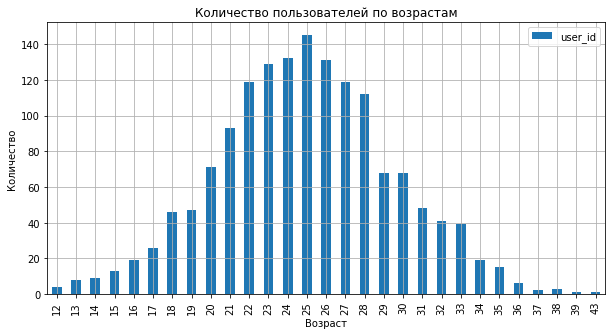

Средний возраст пользователей: 24.9

Статистика по возрасту:

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


In [20]:
# Создаем сводную таблицу
pivot_table_age = users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_index()

# Строим столбчатую диаграмму
pivot_table_age.plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Выводим информацию о возрасте пользователей
print(f'Средний возраст пользователей: {users_go["age"].mean():.1f}')
print()
print('Статистика по возрасту:')
print()
print(users_go['age'].describe())

ВЫВОД:

Сервисом аренды самокатов пользуются клиенты в возрасте от 12 до 43 лет. 

График распределения показывает, что максимальное количество пользователей находятся в возрасте 25 лет. При этом средний возраст и медиана почти идентичны.

# 3.4 расстояние, которое пользователь преодолел за одну поездку

In [21]:
print('Описание столбца "distance" датафрейма "rides_go"')
rides_go['distance'].describe()

Описание столбца "distance" датафрейма "rides_go"


count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

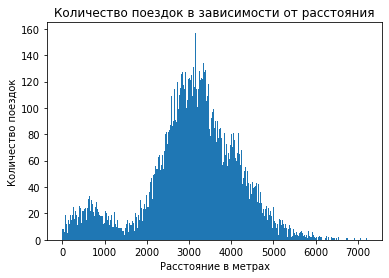

In [22]:
# Строим гистограмму
plt.hist(rides_go['distance'], bins=500)
plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

ВЫВОД:


График количества поездок в зависимости от расстояния и описание датафрейма показывают, что медианное значение составляет 3133 метра. Первый квартиль находится на уровне 2543 метров, а третий квартиль на 3776 метров. Наблюдаются два выраженных пика: один около 700 метров, а другой около 3200 метров. Между этими пиками значения распределены нормально.


# 3.5 продолжительность поездок

In [23]:
print('Описание столбца "duration" датафрейма "rides_go"')
rides_go['duration'].describe()

Описание столбца "duration" датафрейма "rides_go"


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

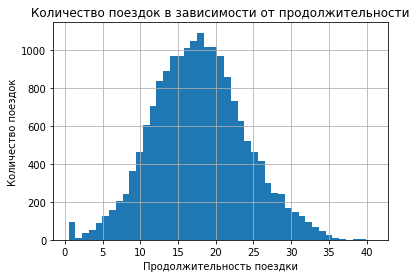

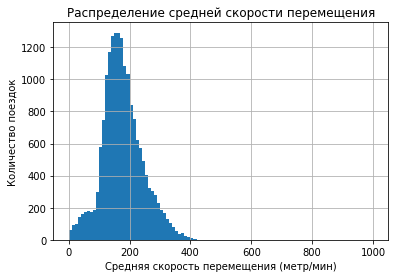

In [24]:
# Строим гистограмму продолжительности поездок
plt.hist(rides_go['duration'], bins=45)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

# Рассчитываем среднюю скорость перемещения для каждой поездки
average_speed = rides_go['distance'] / rides_go['duration']

# Строим гистограмму средней скорости перемещения
plt.hist(average_speed, bins=100, range=(0,1000))
plt.title('Распределение средней скорости перемещения')
plt.xlabel('Средняя скорость перемещения (метр/мин)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

ВЫВОД:


Распределение продолжительности поездок находится в диапазоне от 0 до 41 минуты. Чаще всего в среднем поездки длятся 18 минут. Однако замечается необычное явление: имеется небольшое количество поездок продолжительностью меньше одной минуты, возможно это связано с тем что пользователи отменяли поездку, или же техническая ошибка. 

Промежуточный вывод для исследовательского анализа:

- визуализация и сортировка пользователей указывает что лидер по количевству пользователей является Пятигорск за ним Екатеринбург, Ростов-на-Дону, Краснодар, Сочи. Примечательно что в ТОП-5 входят города, находящиеся на юге, где сезон проката более длителен. Исключением является город Екатеринбург, который находится на втором месте.

- Количество пользователей без подписки 'free' 54,4% превышает количество пользователей с подпиской 'ultra' 45,6%. Всего пользователей без подписки 835, на 136 больше, чем с подпиской.

- Сервисом аренды самокатов пользуются клиенты в возрасте от 12 до 43 лет. График распределения показывает, что максимальное количество пользователей находятся в возрасте 25 лет. При этом средний возраст и медиана почти идентичны.

- График количества поездок в зависимости от расстояния и описание датафрейма показывают, что медианное значение составляет 3133 метра. Первый квартиль находится на уровне 2543 метров, а третий квартиль на 3776 метров. Наблюдаются два выраженных пика: один около 700 метров, а другой около 3200 метров. Между этими пиками значения распределены нормально.

- Распределение продолжительности поездок находится в диапазоне от 0 до 41 минуты. Чаще всего в среднем поездки длятся 18 минут. Однако замечается необычное явление: имеется небольшое количество поездок продолжительностью меньше одной минуты, возможно это связано с тем что пользователи отменяли поездку, или же техническая ошибка. 

#### Шаг 4. Объединение данных

# 4.1 объедините данные о пользователях, поездках и подписках в один датафрейм. 

In [25]:
# Объединяем информацию о пользователях и их поездках
total_data = users_go.merge(rides_go, on='user_id')

# Добавляем информацию о типе подписки для каждого пользователя
total_data = total_data.merge(subscriptions_go, on='subscription_type')


In [26]:
total_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [27]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [28]:
# Выводим количества поездок в обоих датафреймах
print(f"Количество строк в 'rides_go': {rides_go['user_id'].count()}")
print(f"Количество строк в 'total_data': {total_data['user_id'].count()}")

print()  

# Выводим количества уникальных пользователей в обоих датафреймах
print(f"Количество уникальных пользователей в 'users_go': {len(users_go['user_id'].unique())}")
print(f"Количество уникальных пользователей в 'total_data': {len(total_data['user_id'].unique())}")


Количество строк в 'rides_go': 18068
Количество строк в 'total_data': 18068

Количество уникальных пользователей в 'users_go': 1534
Количество уникальных пользователей в 'total_data': 1534


ВЫВОД:

Созданный датафрейм total_data, объединяющий таблицы rides_go и users_go, содержит 18068 строк во всех столбцах, а также кол-во уникальных пользователей содержит 1534 строк, что соответствует исходной таблице 'rides_go' и 'users_go'. Так как исходные датафреймы не содержали пропусков и количество значений в них корректное, значит объединение таблиц прошло успешно.



# 4.2 cоздайте ещё два датафрейма из датафрейма, созданного на этапе   4.1;

# 4.2.1 данные о пользователях без подписки

In [29]:
# Датафрейм данных с пользователями без подписки
free_data = total_data.loc[total_data['subscription_type'] == 'free']
free_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,8,50,0


In [30]:
free_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


# 4.2.2 данные о пользователях с подпиской

In [31]:
# Датафрейм данных с пользователями с подпиской
ultra_data = total_data.loc[total_data['subscription_type'] == 'ultra']
ultra_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [32]:
ultra_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


# 4.3 визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

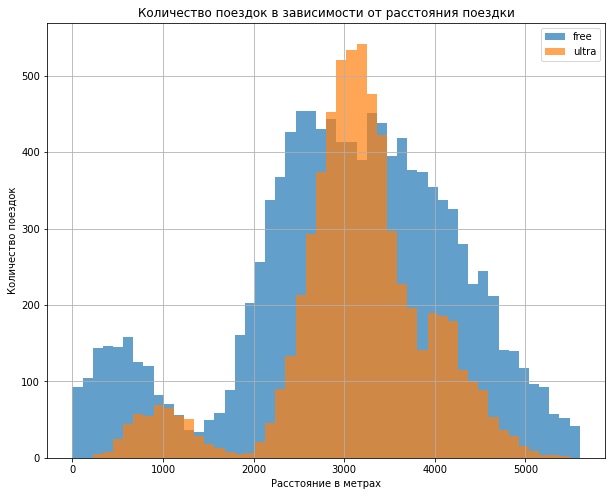

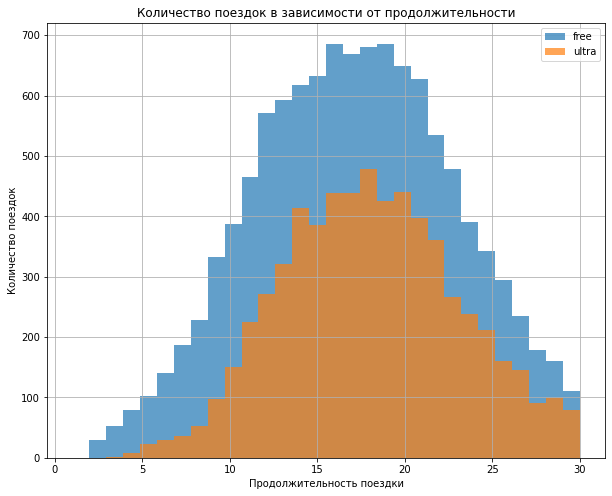

In [33]:
# Гистограмма расстояний для пользователей с разными типами подписок
plt.figure(figsize=(10, 8))
plt.hist(free_data['distance'], bins=50, range=(1, 5600), alpha=0.7, label='free')
plt.hist(ultra_data['distance'], bins=50, range=(1, 5600), alpha=0.7, label='ultra')
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Гистограмма продолжительности поездок для пользователей с разными типами подписок
plt.figure(figsize=(10, 8))
plt.hist(free_data['duration'], bins=30, range=(1, 30), alpha=0.7, label='free')
plt.hist(ultra_data['duration'], bins=30, range=(1, 30), alpha=0.7, label='ultra')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [34]:
total_data.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659992,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831222,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.860000,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.227500,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.610000,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.220000,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.010000,40.823963,12.000000,8.000000,50.000000,199.000000


In [35]:
free_data['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [36]:
ultra_data['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [37]:
free_data['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [38]:
ultra_data['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Промежуточный вывод по объединению и визуализации данных пользователей с подпиской и без:


- Из описания стобцов и визуализации данных для пользователей с разными типами подписок видно, что имеющаяся подписка оказывает влияние на средние значения количества поездок и их продолжительность. Например, медианное расстояние поездки для пользователей с подпиской немного выше, чем для пользователей без подписки (расстояния поезки без подписки 3114.65 метров с подпиской 3148.64 метров). Также наблюдается сокращение разброса данных и более узкий интервал для пользователей с подпиской.



- Аналогично, визуализация данных для количества поездок за определенное время также указывает, что подписка влияет на значения. Среднее время поездки для пользователей без подписки составляет около 18 минут, в то время как для пользователей с подпиской - около 19 минут. Кроме того, стандартное отклонение значительно снижается у пользователей с подпиской (без подписки - 6.33, с подпиской - 5.57), что указывает на более стабильное время поездок у этой группы пользователей.

#### Шаг 5. Подсчёт выручки

# 5.1 создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [39]:
# Окргуляем продолжительность поездок до следующего целого числа
total_data['duration'] = np.ceil(total_data['duration']).astype('int')

In [40]:
# Создаем сводную таблицу для подсчета обьединенных данных по пользователю и месяцу
revenue_per_month = (
    total_data
    .pivot_table(index=('user_id', 'month'), values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), aggfunc={'distance': ['count', 'sum'], 'duration': 'sum', 'minute_price': 'mean', 'start_ride_price': 'mean', 'subscription_fee': 'mean'})
)

# Переименовываем столбцы 
revenue_per_month.columns = ['count', 'total_distance', 'total_duration', 'minute_price', 'start_ride_price', 'subscription_fee']


revenue_per_month.head(20)




count  total_distance  total_duration  minute_price  \
user_id month                                                        
1       1          2         7027.51              42             6   
        4          1          754.16               7             6   
        8          2         6723.47              46             6   
        10         2         5809.91              32             6   
        11         3         7003.50              56             6   
        12         2         6751.63              28             6   
2       3          3        10187.73              63             6   
        4          2         6164.39              40             6   
        6          1         3255.34              14             6   
        7          2         6780.73              48             6   
        8          1          923.01               7             6   
        10         1         2824.64              19             6   
        12         1         3828.25              12             6   
3       1          1         3061.78              13             6   
        2          2         5421.16              39             6   
        4          1         2956.65              21             6   
        5          3         9064.03              63             6   
        7          3        10919.59              67             6   
        9          1         2891.01              23             6   
        12         1         2593.38              13             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
        12                    0               199  
2       3                     0               199  
        4                     0               199  
        6                     0               199  
        7                     0               199  
        8                     0               199  
        10                    0               199  
        12                    0               199  
3       1                     0               199  
        2                     0               199  
        4                     0               199  
        5                     0               199  
        7                     0               199  
        9                     0               199  
        12                    0               199

In [41]:
revenue_per_month.query('user_id == 1')

count  total_distance  total_duration  minute_price  \
user_id month                                                        
1       1          2         7027.51              42             6   
        4          1          754.16               7             6   
        8          2         6723.47              46             6   
        10         2         5809.91              32             6   
        11         3         7003.50              56             6   
        12         2         6751.63              28             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
        12                    0               199

# 5.2 в этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

In [42]:
# Добавляем столбец с выручкой
revenue_per_month['revenue'] = (
    revenue_per_month['start_ride_price'] * revenue_per_month['count'] +
    revenue_per_month['minute_price'] * revenue_per_month['total_duration'] +
    revenue_per_month['subscription_fee']
)

# Выводим информацию о временном периоде и общую выручку за год
print('Записи с', total_data['date'].min(), 'по', total_data['date'].max())
print('Выручка за год составила:', revenue_per_month['revenue'].sum())


Записи с 2021-01-01 00:00:00 по 2021-12-30 00:00:00
Выручка за год составила: 3878641


ВЫВОД:

Из представленных данных мы провели анализ поездок пользователей на основе их типах подписок. Сначала мы обьединили данные о поездках для каждого пользователя за каждый месяц, вычислив суммарное расстояние, количество поездок и суммарное время. Затем мы добавили столбец с помесячной выручкой, учитывая цены как для пользователей с подпиской, так и для пользователей без нее. Выручка за год составила 3 878 641 руб.

#### Шаг 6. Проверка гипотез

# 6.1 тратят ли пользователи с подпиской больше времени на поездки? 

ВЫДВИНЕМ ГИПОТЕЗЫ:

Нулевая и альтернативная гипотезы:


- Гипотеза Н0: Средняя продолжительность поездок с подпиской  и без подписки равна.


- Гипотеза Н1: Средняя продолжительность поездок с подпиской больше, чем без подписки.

In [43]:
# Выполняем t-тест для сравнения средней продолжительности поездок для пользователей с подпиской ultra и без подписки free
results = st.ttest_ind(ultra_data['duration'], free_data['duration'], alternative='greater')

print(results.pvalue)

# Проверяем статистическую значимость результатов
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


1.2804098316645618e-34
Отвергаем нулевую гипотезу


ВЫВОД:

Нулевая гипотеза отвергнута

Это говорит о том, что средняя продолжительность поездки для пользователей с подпиской больше, чем продолжительность поездок для пользователей без подписки, при выбранном уровне значимости в 5%.

# 6.2 приемлемое растояние поездки с точки зрения износа самоката для пользователей с подпиской

Приемлемое расстояние с точки зрения износа самоката — 3130 метров.

Нулевая и альтернативная гипотезы:


- Гипотеза Н0: Среднее расстояние поездок с использованием подписки равно оптимальному расстоянию в 3130 метров.


- Гипотеза Н1: Среднее расстояние поездок с использованием подписки более 3130 метров.

In [44]:
optimal_distance = 3130

# Выполняем одновыборочный t-тест для проверки гипотезы.
results = st.ttest_1samp(ultra_data['distance'], optimal_distance , alternative='greater')

print(results.pvalue)

# Проверяем статистическую значимость результатов
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


ВЫВОД:

Не удалось отвергнуть гипотезу, это говорит о том, что среднее расстояние поездок с использованием подписки меньше или равно 3130 метров.

# 6.3 помесчячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки? сделать выводы

Нулевая и альтернативная гипотезы:

- Гипотеза Н0: Месячна средняя выручка от поездок с разной подпиской равна.


- Гипотеза Н1: Месячная средняя выручка от поездок с использованием подписки больше, чем выручка без ипользования подписки.

In [45]:
# Выполняем t-тест для сравнения месячной выручки от пользователей с подпиской и без подписки.
results = st.ttest_ind(
    revenue_per_month.loc[revenue_per_month['subscription_fee'] > 0, 'revenue'], 
    revenue_per_month.loc[revenue_per_month['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')

print(results.pvalue)

# Проверяем статистическую значимость результатов
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


ВЫВОД:
    

Полученные результаты позволяют отвергнуть нулевую гипотезу. Это говорит о том, что средняя месячная выручка от пользователей с подпиской статистически превышает среднюю месячную выручку от пользователей без подписки, при уровне значимости 5%.

# 6.4 техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. какой тест вам понадобился бы для проверки этой гипотезы?

Если в данных переменная измеряется дважды для одних и тех же объектов и обе выборки имеют одинаковые размеры, то можно использовать метод scipy.stats.ttest_rel(). Для проверки того, что среднее значение до изменения больше, чем истинное среднее значение после нужно указать параматер alternative='less'. Если же эти условия не выполняются, можно применить метод scipy.stats.ttest_ind(). В этом случае, так как выборки не равны нам нужно установить параметр equal_var=False.

Промежуточный вывод по проверке гипотез:
 - Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
 - Нулевая гипотеза отвергнута. Это говорит о том, что средняя продолжительность поездки для пользователей с подпиской больше, чем продолжительность поездок для пользователей без подписки, при выбранном уровне значимости в 5%.
 
 
 - Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
 - Не удалось отвергнуть гипотезу, это говорит о том, что среднее расстояние поездок с использованием подписки меньше или равно 3130 метров.
 
 
 - Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
 - Отвергли нулевую гипотезу. Можно утверждать, что средняя выручка в месяц от пользователей с подпиской превышает среднюю выручку от пользователей без подписки при уровне значимости 5%.


 - Ответили на вопрос какой тест нам понадобился бы для проверки гипотезы.
 - Если в данных переменная измеряется дважды для одних и тех же объектов и обе выборки имеют одинаковые размеры, то можно использовать метод scipy.stats.ttest_rel(). Для проверки того, что среднее значение до изменения больше, чем истинное среднее значение после нужно указать параматер alternative='less'. Если же эти условия не выполняются, можно применить метод scipy.stats.ttest_ind(). В этом случае, так как выборки не равны нам нужно установить параметр equal_var=False.
 
В заключении можно сделать вывод: 
- Пользователи с подпиской приносят больше выручки сервису аренды самокатов. Следовательно, руководству сервиса рекомендуется принять меры для того чтобы клиенты переходили на подписку.

# Общий вывод:



В процессе исследования данных сервиса аренды самокатов "GoFast" были проведены несколько этапов анализа.

- Предварительная обработка данных включала удаление дубликатов, округление значений расстояния и времени поездок, а также преобразование столбца с датами.


- В ходе исследовательского анализа данных были выявлены основные характеристики пользователей. Большой спрос имеют пользователи которые проживают в южных городах, а возрастная структура пользователей средней и медианной возрастной группы составляет около 25 лет. Количество поездок в среднем составляет около 3130 метров, хотя наблюдаются аномальные значения с низкими продолжительностями, что может указывать на проблемы с данными.


- Объединение данных о поездках и подписках позволило выявить влияние подписки на характеристики поездок. Пользователи с подпиской "ultra" имеют немного большие значения расстояния и времени поездок по сравнению с пользователями без подписки "free". Однако различия в данных не всегда являются статистически значимыми. Выводы указывают на то, что подписка влияет на характеристики поездок, хотя этот эффект не всегда является существенным. 


- Анализ поездок пользователей на основе их типах подписок. Сначала мы обьединили данные о поездках для каждого пользователя за каждый месяц, вычислив суммарное расстояние, количество поездок и суммарное время. Затем мы добавили столбец с помесячной выручкой, учитывая цены как для пользователей с подпиской, так и для пользователей без нее. Выручка за год составила 3 878 641 руб.


Проверили гипотезы:
- Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- Нулевая гипотеза отвергнута. Это говорит о том, что средняя продолжительность поездки для пользователей с подпиской больше, чем продолжительность поездок для пользователей без подписки, при выбранном уровне значимости в 5%. Это может означать, что пользователи с подпиской предпочитают делать более длительные поездки, возможно, из-за более выгодных условий использования.
 
 
 - Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
 - Не удалось отвергнуть гипотезу, это говорит о том, что среднее расстояние поездок с использованием подписки меньше или равно 3130 метров. Это может говорить о том, что условие 3130 метров является достаточным для обеих групп пользователей.
 
 
 - Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
 - Отвергли нулевую гипотезу. Можно утверждать, что средняя выручка в месяц от пользователей с подпиской превышает среднюю выручку от пользователей без подписки при уровне значимости 5%. Это говорит о том, что компании выгоднее иметь пользователей с подпиской, так как они приносят больше выручки, возможно, благодаря регулярным ежемесячным платежам и более частому использованию услуг.


 - Ответили на вопрос какой тест нам понадобился бы для проверки гипотезы.
 - Если в данных переменная измеряется дважды для одних и тех же объектов и обе выборки имеют одинаковые размеры, то можно использовать метод scipy.stats.ttest_rel(). Для проверки того, что среднее значение до изменения больше, чем истинное среднее значение после нужно указать параматер alternative='less'. Если же эти условия не выполняются, можно применить метод scipy.stats.ttest_ind(). В этом случае, так как выборки не равны нам нужно установить параметр equal_var=False.
 
В заключении можно сделать вывод: 
- Пользователи с подпиской приносят больше выручки сервису аренды самокатов. Следовательно, руководству сервиса рекомендуется принять меры для того чтобы клиенты переходили на подписку.